# Bias and Variance in Machine Learning


In this notebook, we will understand **Bias** and **Variance** in Machine Learning using simple examples.

- **Bias**: Error due to overly simplistic assumptions in the model (underfitting).
- **Variance**: Error due to too much complexity in the model (overfitting).

We will use a **Polynomial Regression** example to visualize bias and variance.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


### Step 1: Generate Synthetic Data

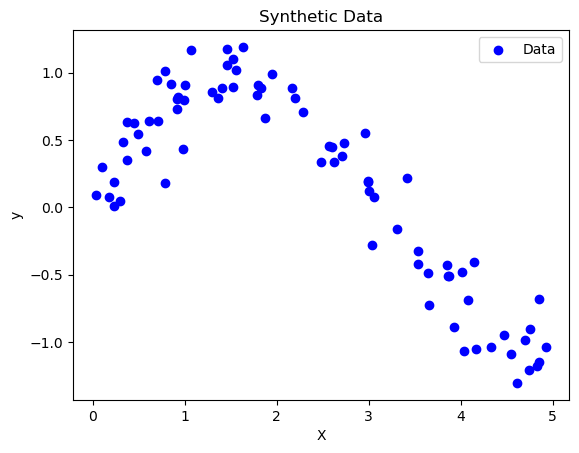

In [2]:

# Generate data (y = sin(x) + noise)
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

plt.scatter(X, y, color="blue", label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.legend()
plt.show()


### Step 2: Train-Test Split

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Step 3: Fit Models with Different Complexity

In [4]:

def plot_model(degree):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Plot
    X_line = np.linspace(0, 5, 100).reshape(-1, 1)
    y_line = model.predict(poly.transform(X_line))

    plt.scatter(X_train, y_train, color="blue", label="Train Data")
    plt.scatter(X_test, y_test, color="green", label="Test Data")
    plt.plot(X_line, y_line, color="red", label=f"Model (Degree={degree})")
    plt.title(f"Polynomial Degree={degree}\nTrain Error={train_error:.3f}, Test Error={test_error:.3f}")
    plt.legend()
    plt.show()

    return train_error, test_error


### Step 4: Visualizing Bias vs Variance

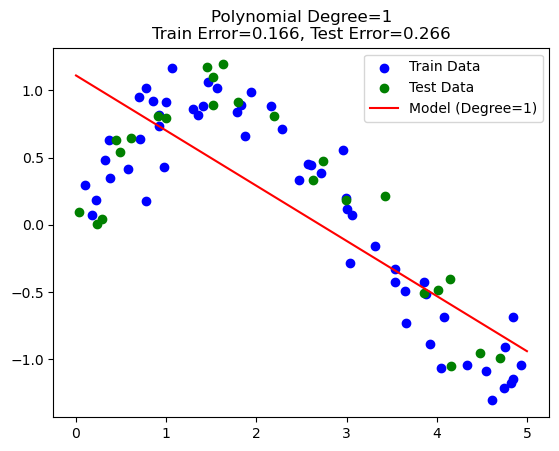

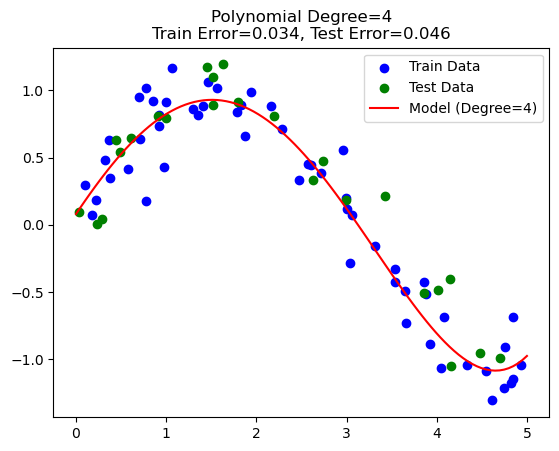

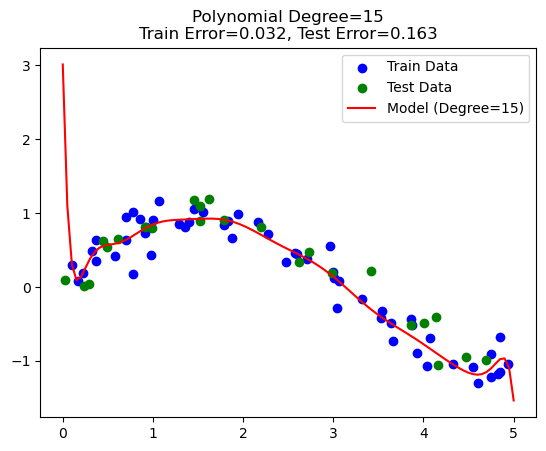

In [5]:

errors = {}
for degree in [1, 4, 15]:
    errors[degree] = plot_model(degree)


### Step 5: Error Curve for Different Model Complexities

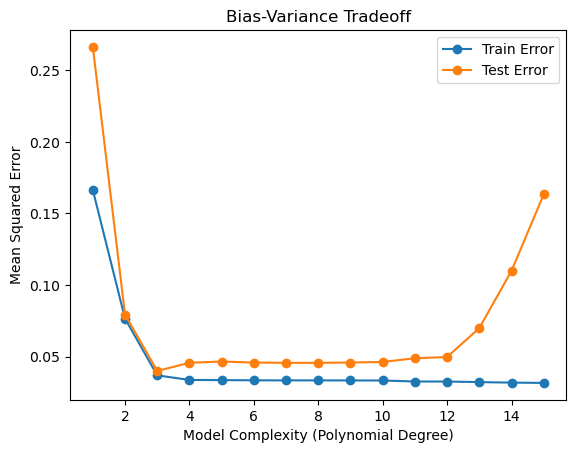

In [6]:

train_errors = []
test_errors = []
degrees = range(1, 16)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly, y_train)

    train_errors.append(mean_squared_error(y_train, model.predict(X_poly)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test_poly)))

plt.plot(degrees, train_errors, label="Train Error", marker="o")
plt.plot(degrees, test_errors, label="Test Error", marker="o")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.show()
